In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = '/media/hamim/9ff9f0c5-df5c-47d7-94bb-b1b7451e18fd/datanakhaee/flowers/'

In [4]:
!ls /media/hamim/9ff9f0c5-df5c-47d7-94bb-b1b7451e18fd/datanakhaee/flowers/

daisy  dandelion  rose	sunflower  train  tulip  valid


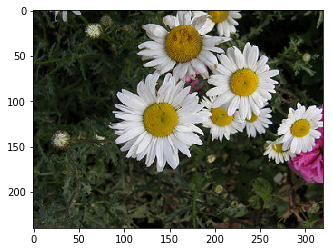

In [14]:
files = os.listdir(f'{PATH}/train/daisy')
img = plt.imread(f'{PATH}/train/daisy/{files[0]}')
plt.imshow(img)

In [5]:
size =224

In [7]:
arch =resnet34
tfms = tfms_from_model(arch,size)


In [16]:
data = ImageClassifierData.from_paths(PATH,tfms = tfms)

In [10]:
data.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [11]:
data.val_y

array([0, 0, 0, ..., 4, 4, 4])

In [17]:
learn  = ConvLearner.pretrained(arch,data)
learn.fit(0.01,2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.805012   0.364332   0.882283  
    1      0.570749   0.311465   0.89239                   



[array([0.31146]), 0.8923900119614799]

In [19]:
log_preds = learn.predict()
preds = np.argmax(log_preds,axis = 1)
preds

array([0, 0, 0, ..., 4, 4, 4])

In [20]:
preds.shape

(1682,)

In [21]:
data.val_y.shape

(1682,)

In [22]:
data.val_y

array([0, 0, 0, ..., 4, 4, 4])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data.val_y,preds)

[[250   7   6   7   9]
 [ 15 388   2  16   4]
 [  4   2 257   3  38]
 [  4  13   2 245   6]
 [  3   5  28   7 361]]


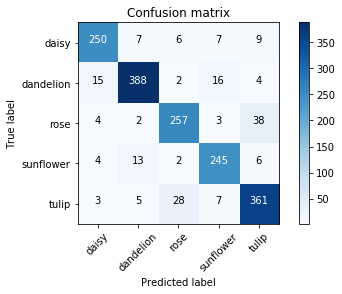

In [25]:
plot_confusion_matrix(cm, data.classes)

In [26]:
learn  = ConvLearner.pretrained(arch,data)
learn.lr_find()

 95%|█████████▌| 40/42 [00:05<00:00,  7.54it/s, loss=2.47]


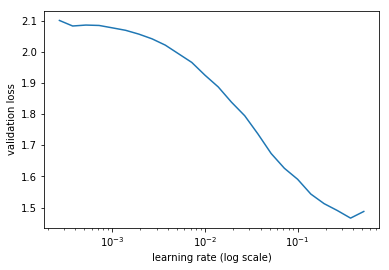

In [27]:
learn.sched.plot()

In [28]:
learn.fit(0.1,3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.849487   0.507754   0.849584  
    1      0.741959   0.346189   0.88585                   
    2      0.596685   0.358619   0.888823                  



[array([0.35862]), 0.8888228301060752]

In [29]:
learn.fit(0.1,4)

epoch      trn_loss   val_loss   accuracy                  
    0      0.363209   0.305264   0.895363  
    1      0.340962   0.300642   0.901902                  
    2      0.295256   0.28217    0.908442                  
    3      0.281213   0.272808   0.91082                   



[array([0.27281]), 0.9108204516304234]